In [58]:
import pandas as pd
import numpy as np
import geopandas as gpd 
from shapely.geometry import Point
import matplotlib.pyplot as plt 
import os 
import seaborn as sns
import statsmodels.formula.api as smf
import warnings
import urllib.request
warnings.filterwarnings('ignore')
%matplotlib inline 

In [119]:
complaints = pd.read_csv("C:/Users/ar7603/Desktop/c.csv")

In [120]:
complaints

,Created Date,Agency,Agency Name,Complaint Type,Incident Zip
0,12/7/2017 11:26,DPR,Department of Parks and Recreation,Maintenance or Facility,11203.0
1,12/8/2019 14:40,HPD,Department of Housing Preservation and Develop...,UNSANITARY CONDITION,10467.0
2,12/7/2017 15:34,DOF,Refunds and Adjustments,DOF Property - Payment Issue,10017.0
3,12/7/2017 14:02,DOF,Refunds and Adjustments,DOF Parking - Payment Issue,NaN
4,6/12/2020 23:36,OSE,MayorÃ¢Â€Â™s Office of Special Enforcement,NonCompliance with Phased Reopening,11235.0
...,...,...,...,...,...
39671,5/29/2020 20:18,NYPD,New York City Police Department,Noise - Residential,10027.0
39672,7/10/2017 12:00,DSNY,Department of Sanitation,Derelict Vehicles,11423.0
39673,7/10/2017 12:05,DSNY,Department of Sanitation,Graffiti,11208.0
39674,7/10/2017 16:16,DSNY,Department of Sanitation,Graffiti,11218.0


In [121]:
complaints = complaints.loc[(complaints['Incident Zip']>=10000)&(complaints['Incident Zip']<11500)]

In [122]:
complaints.rename(columns={'Created Date':'CDate'}, inplace=True)
complaints.rename(columns={'Incident Zip':'Zip'}, inplace=True)

In [123]:
complaints['Zip'].unique()

array([11203., 10467., 10017., 11235., 11208., 11105., 11214., 11226.,
       10016., 11355., 10029., 11432., 10462., 11102., 10024., 10013.,
       10010., 11209., 11356., 10314., 10128., 11361., 11106., 10040.,
       10310., 11435., 11234., 11217., 11238., 11216., 10034., 11373.,
       10312., 10021., 11233., 11201., 11237., 10065., 10027., 11215.,
       10003., 11369., 11211., 10039., 11207., 10308., 11236., 11222.,
       11418., 11213., 10459., 11378., 11420., 10457., 11205., 11364.,
       11103., 11221., 10031., 10012., 11411., 10451., 11223., 10456.,
       10461., 11249., 11219., 11419., 11206., 11436., 11385., 11375.,
       11204., 10038., 10466., 10474., 10014., 11212., 10009., 11414.,
       10302., 11218., 11354., 10306., 11210., 10011., 10460., 10025.,
       10469., 10304., 10475., 11379., 11358., 11366., 10023., 10465.,
       11372., 10002., 11357., 10001., 11417., 11433., 11104., 11426.,
       10468., 10458., 10453., 10030., 11229., 11416., 11421., 11370.,
      

In [124]:
complaints

,CDate,Agency,Agency Name,Complaint Type,Zip
0,12/7/2017 11:26,DPR,Department of Parks and Recreation,Maintenance or Facility,11203.0
1,12/8/2019 14:40,HPD,Department of Housing Preservation and Develop...,UNSANITARY CONDITION,10467.0
2,12/7/2017 15:34,DOF,Refunds and Adjustments,DOF Property - Payment Issue,10017.0
4,6/12/2020 23:36,OSE,MayorÃ¢Â€Â™s Office of Special Enforcement,NonCompliance with Phased Reopening,11235.0
5,12/8/2019 16:37,HPD,Department of Housing Preservation and Develop...,DOOR/WINDOW,11208.0
...,...,...,...,...,...
39671,5/29/2020 20:18,NYPD,New York City Police Department,Noise - Residential,10027.0
39672,7/10/2017 12:00,DSNY,Department of Sanitation,Derelict Vehicles,11423.0
39673,7/10/2017 12:05,DSNY,Department of Sanitation,Graffiti,11208.0
39674,7/10/2017 16:16,DSNY,Department of Sanitation,Graffiti,11218.0


In [125]:
comp = complaints[['Zip','Complaint Type']].groupby(by='Zip', as_index=False).count()

In [126]:
comp.rename(columns={'Complaint Type':'Complaints'}, inplace=True)

In [127]:
comp

,Zip,Complaints
0,10000.0,4
1,10001.0,231
2,10002.0,343
3,10003.0,282
4,10004.0,34
...,...,...
197,11432.0,249
198,11433.0,181
199,11434.0,298
200,11435.0,209


In [128]:
url = 'https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip'
urllib.request.urlretrieve(url)

('C:\\Users\\ar7603\\AppData\\Local\\Temp\\tmppdhjsni7',
 <http.client.HTTPMessage at 0x1295704fd90>)

In [129]:
zipcode = gpd.read_file(r'C:\Users\ar7603\Downloads\ZIP_CODE_040114\ZIP_CODE_040114.shp')
zipcode.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17..."


In [130]:
zipcode['ZIPCODE'] = zipcode['ZIPCODE'].astype(int)
NYC_zipcode = zipcode['ZIPCODE'].unique()
NYC_zipcode

array([11436, 11213, 11212, 11225, 11218, 11226, 11219, 11210, 11230,
       11204, 10471, 10470, 10466, 10467, 10463, 10475, 10464, 10469,
       10468, 10458, 10034, 10033, 10462, 10040, 10453, 10465, 10461,
       10457, 10460, 10032, 10452, 10456, 10472, 10031, 10039, 10459,
       10451, 10473, 10030, 10027, 10474, 10455, 10037, 10024, 10454,
       10026, 10035, 10048, 10025, 11357, 10029,    83, 11356, 11359,
       11360, 11105, 10128, 10023, 11363, 10028, 11354, 11102, 11370,
       10021, 11358, 11362, 10044, 11369, 11103, 11106, 11368, 11377,
       11355, 11101, 11364, 10018, 10020, 11005, 10017, 10001, 10011,
       10016, 11104, 11109, 10010, 11367, 10014, 10003, 11222, 10002,
       11378, 10009, 10012, 10013, 10007, 11237, 11385, 10038, 11206,
       10006, 11412, 10005, 11251, 10004, 11411, 11201, 11205, 11208,
       11207, 11413, 11217, 11238, 11231, 11422, 11420, 11417, 11215,
       11232, 11430, 11203, 11239, 11236, 11220, 10301, 10303, 11234,
       10302, 11693,

<AxesSubplot:>

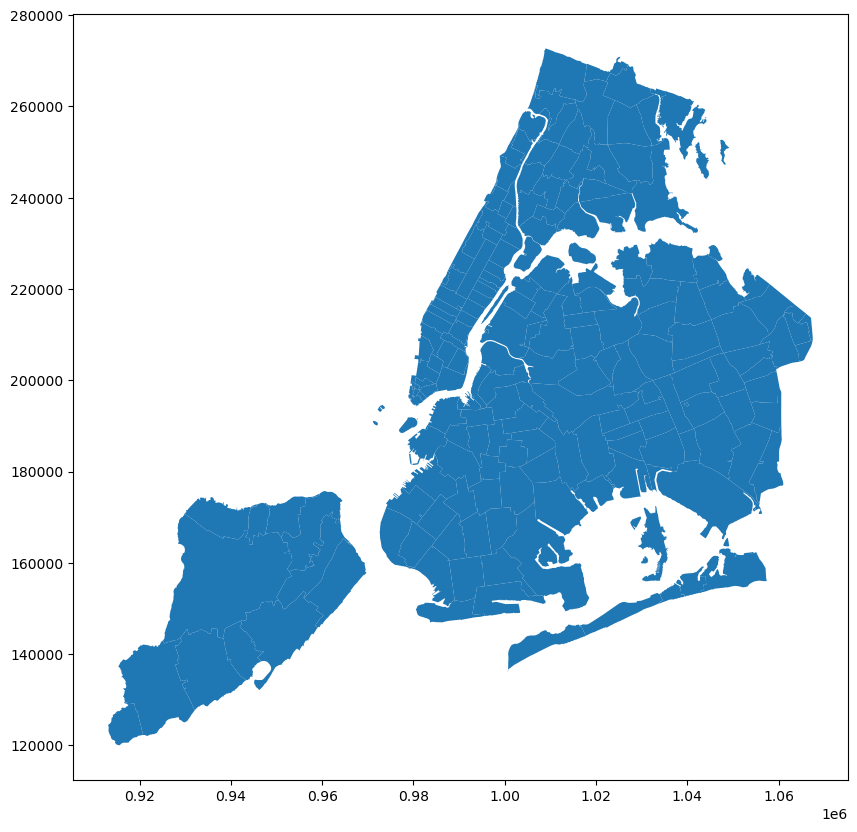

In [131]:
zipcode.plot(figsize=(10,10),aspect='equal')


In [132]:
comp.Zip = comp.Zip.astype(str)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

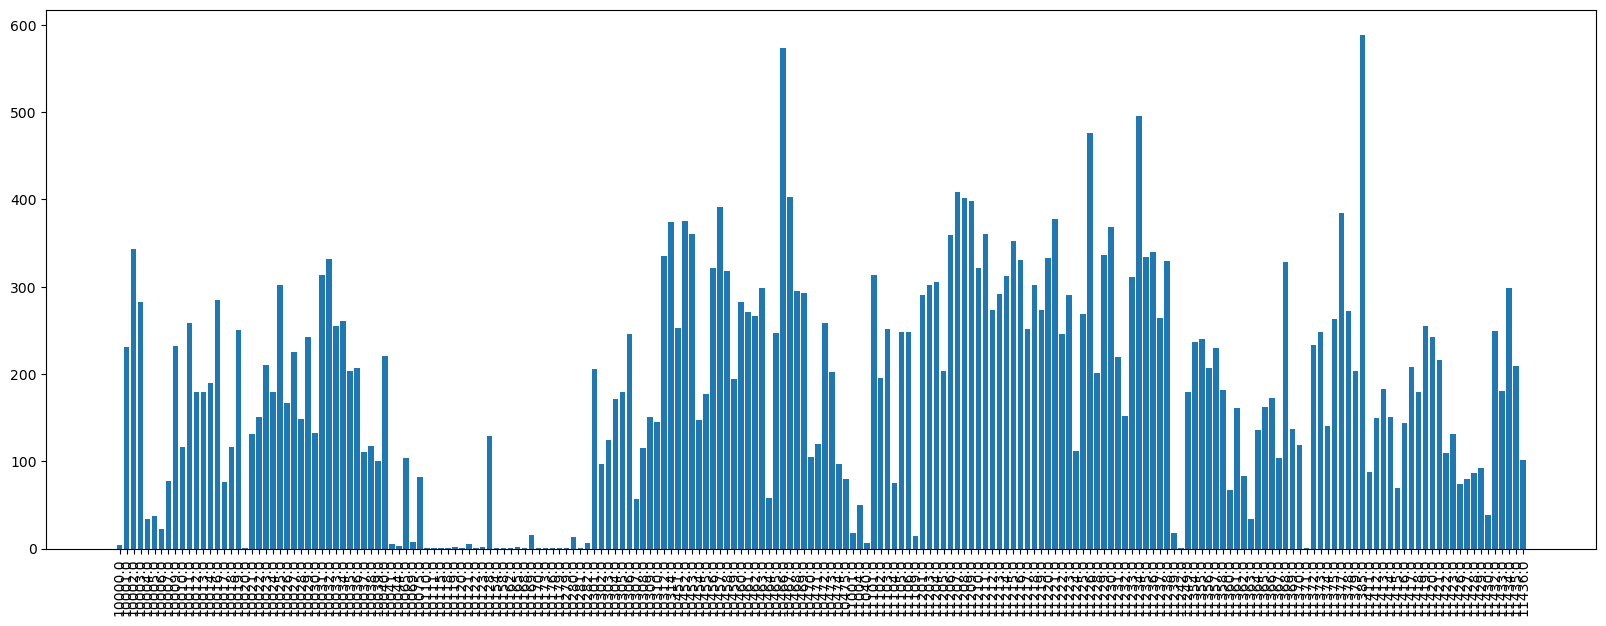

In [133]:
plt.figure(figsize=(20, 7))

plt.bar(comp.Zip, comp.Complaints)
plt.xticks(rotation=90)

In [134]:
comp['Zip'] = comp['Zip'].astype(float)

In [135]:
spatial = zipcode.merge(comp, left_on='ZIPCODE', right_on='Zip')

<AxesSubplot:>

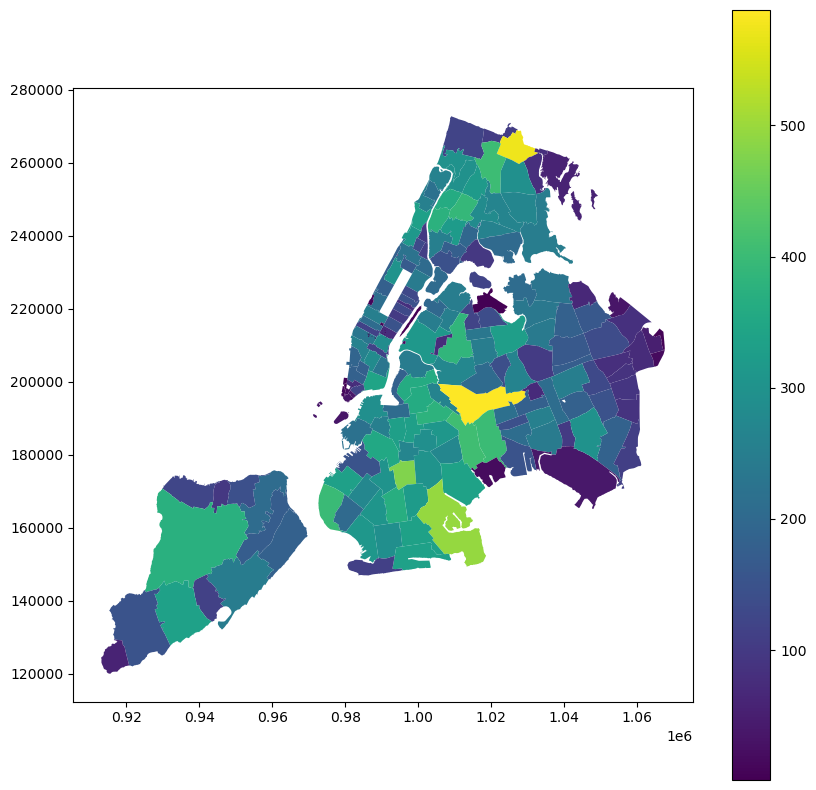

In [136]:
spatial.plot(figsize=(10,10), column='Complaints', legend=True)

In [137]:
complaints['CDate'] = pd.to_datetime(complaints['CDate'], errors = 'coerce')

In [138]:
complaints['Date'] = complaints['CDate'].dt.date
complaints['Month'] = complaints['CDate'].dt.month
complaints['Year'] = complaints['CDate'].dt.year
complaints['DOW'] = complaints['CDate'].dt.dayofweek
complaints['Hour'] = complaints['CDate'].dt.hour
complaints = complaints.loc[complaints['Year'].isin([2017,2018,2019,2020,2021])]

In [139]:
complaints

,CDate,Agency,Agency Name,Complaint Type,Zip,Date,Month,Year,DOW,Hour
0,2017-12-07 11:26:00,DPR,Department of Parks and Recreation,Maintenance or Facility,11203.0,2017-12-07,12,2017,3,11
1,2019-12-08 14:40:00,HPD,Department of Housing Preservation and Develop...,UNSANITARY CONDITION,10467.0,2019-12-08,12,2019,6,14
2,2017-12-07 15:34:00,DOF,Refunds and Adjustments,DOF Property - Payment Issue,10017.0,2017-12-07,12,2017,3,15
4,2020-06-12 23:36:00,OSE,MayorÃ¢Â€Â™s Office of Special Enforcement,NonCompliance with Phased Reopening,11235.0,2020-06-12,6,2020,4,23
5,2019-12-08 16:37:00,HPD,Department of Housing Preservation and Develop...,DOOR/WINDOW,11208.0,2019-12-08,12,2019,6,16
...,...,...,...,...,...,...,...,...,...,...
39671,2020-05-29 20:18:00,NYPD,New York City Police Department,Noise - Residential,10027.0,2020-05-29,5,2020,4,20
39672,2017-07-10 12:00:00,DSNY,Department of Sanitation,Derelict Vehicles,11423.0,2017-07-10,7,2017,0,12
39673,2017-07-10 12:05:00,DSNY,Department of Sanitation,Graffiti,11208.0,2017-07-10,7,2017,0,12
39674,2017-07-10 16:16:00,DSNY,Department of Sanitation,Graffiti,11218.0,2017-07-10,7,2017,0,16


In [146]:
Data17 = complaints.loc[complaints['Year'] == 2017]

Data18 = complaints.loc[complaints['Year'] == 2018]

Data19 = complaints.loc[complaints['Year'] == 2019]

Data20 = complaints.loc[complaints['Year'] == 2020]

Data21 = complaints.loc[complaints['Year'] == 2021]

In [151]:
Data17zip = Data17.groupby(['Zip']).agg({'Complaint Type':'count'}).reset_index()
Data18zip = Data18.groupby(['Zip']).agg({'Complaint Type':'count'}).reset_index()
Data19zip = Data19.groupby(['Zip']).agg({'Complaint Type':'count'}).reset_index()
Data20zip = Data20.groupby(['Zip']).agg({'Complaint Type':'count'}).reset_index()
Data21zip = Data21.groupby(['Zip']).agg({'Complaint Type':'count'}).reset_index()

In [153]:
Data17zip.rename(columns={'Complaint Type':'Complaints'}, inplace=True)
Data18zip.rename(columns={'Complaint Type':'Complaints'}, inplace=True)
Data19zip.rename(columns={'Complaint Type':'Complaints'}, inplace=True)
Data20zip.rename(columns={'Complaint Type':'Complaints'}, inplace=True)
Data21zip.rename(columns={'Complaint Type':'Complaints'}, inplace=True)

In [154]:
Data21zip.head()

,Zip,Complaints
0,10001.0,9
1,10002.0,20
2,10003.0,21
3,10007.0,2
4,10009.0,16


In [172]:
DATA = Data21zip

In [173]:
DATA['17'] = Data17zip['Complaints']
DATA['18'] = Data18zip['Complaints']
DATA['19'] = Data19zip['Complaints']
DATA['20'] = Data20zip['Complaints']
DATA['21'] = Data21zip['Complaints']

In [177]:
DATA.drop(columns='Complaints')

,Zip,17,18,19,20,21
0,10001.0,68,3.0,5.0,4,9
1,10002.0,135,9.0,7.0,146,20
2,10003.0,127,2.0,10.0,172,21
3,10007.0,15,1.0,1.0,122,2
4,10009.0,14,1.0,7.0,19,16
...,...,...,...,...,...,...
167,11432.0,61,NaN,NaN,93,16
168,11433.0,79,NaN,NaN,310,13
169,11434.0,81,NaN,NaN,36,29
170,11435.0,98,NaN,NaN,62,18


In [163]:
Data17zip['17_18_Change'] = Data18zip['Complaints'] - Data17zip['Complaints']
Data17zip['18_19_Change'] = Data19zip['Complaints'] - Data18zip['Complaints']
Data17zip['19_20_Change'] = Data20zip['Complaints'] - Data19zip['Complaints']
Data17zip['20_21_Change'] = Data21zip['Complaints'] - Data20zip['Complaints']

Data17zip.head()

,Zip,Complaints,17_18_Change,18_19_Change,19_20_Change,20_21_Change
0,10001.0,68,-65.0,2.0,-1.0,5.0
1,10002.0,135,-126.0,-2.0,139.0,-126.0
2,10003.0,127,-125.0,8.0,162.0,-151.0
3,10004.0,15,-14.0,0.0,121.0,-120.0
4,10005.0,14,-13.0,6.0,12.0,-3.0


In [164]:
Data = Data17zip

In [165]:
split = zipcode.merge(Data,left_on='ZIPCODE',right_on='Zip',how='left')
split.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry,Zip,Complaints,17_18_Change,18_19_Change,19_20_Change,20_21_Change
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ...",11436.0,40.0,NaN,NaN,NaN,NaN
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ...",11213.0,93.0,-90.0,5.0,157.0,-128.0
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ...",11212.0,83.0,-80.0,2.0,150.0,-125.0
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18...",11225.0,83.0,-79.0,0.0,110.0,-112.0
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17...",11218.0,103.0,-101.0,0.0,131.0,-119.0


<AxesSubplot:>

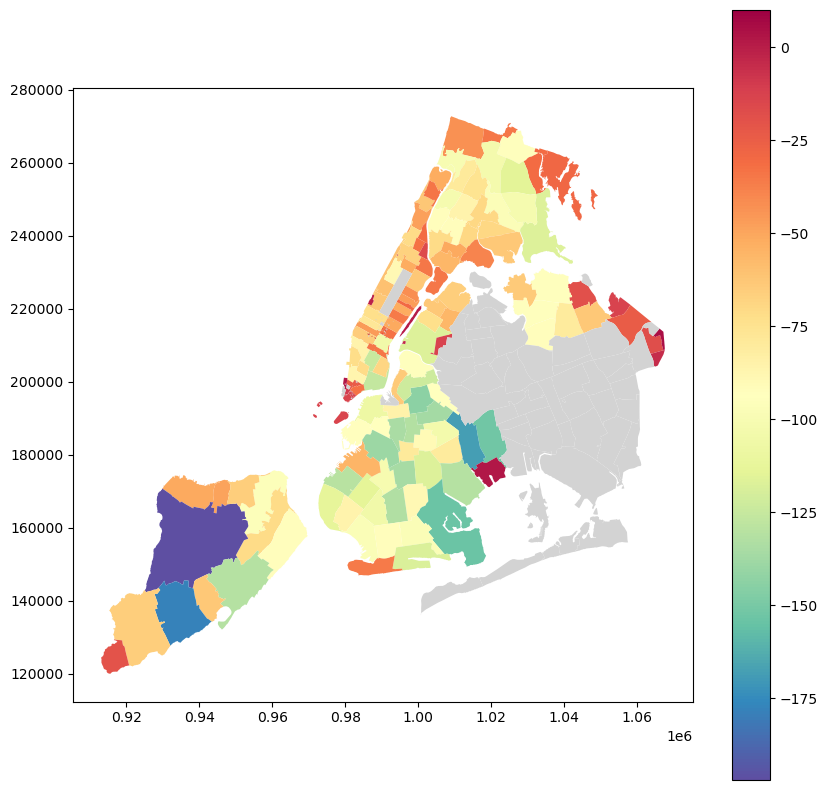

In [166]:
split.plot(column='17_18_Change',colormap='Spectral_r',legend=True,markersize=0.01,figsize=(10,10),missing_kwds={
                "color": "lightgrey",
                "hatch": "",
                "label": "Missing values",
                },)
     

<AxesSubplot:>

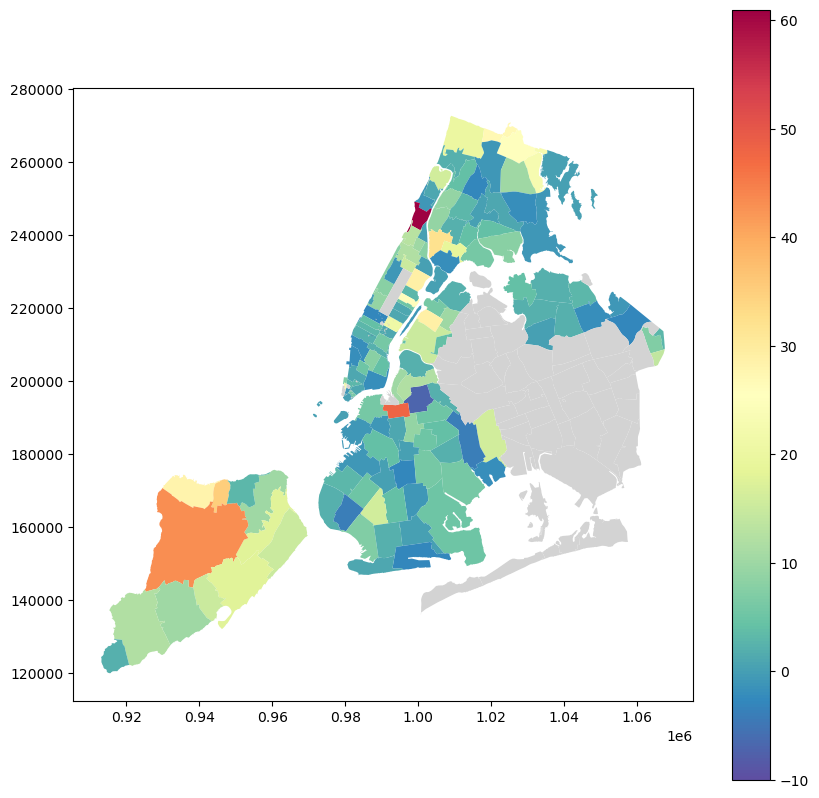

In [167]:
split.plot(column='18_19_Change',colormap='Spectral_r',legend=True,markersize=0.01,figsize=(10,10),missing_kwds={
                "color": "lightgrey",
                "hatch": "",
                "label": "Missing values",
                },)
     

<AxesSubplot:>

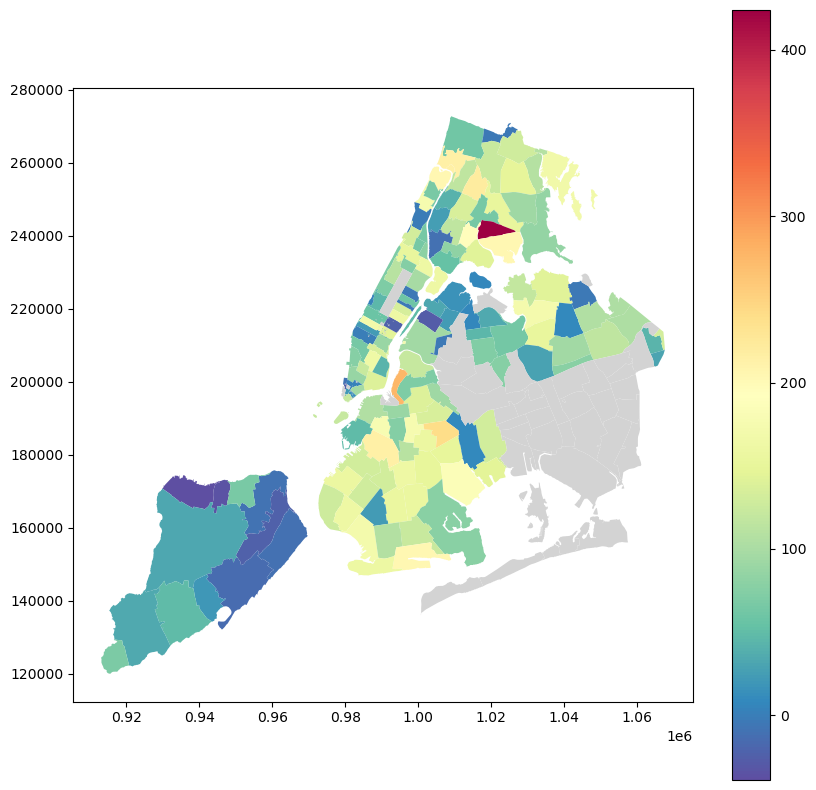

In [168]:
split.plot(column='19_20_Change',colormap='Spectral_r',legend=True,markersize=0.01,figsize=(10,10),missing_kwds={
                "color": "lightgrey",
                "hatch": "",
                "label": "Missing values",
                },)
     

<AxesSubplot:>

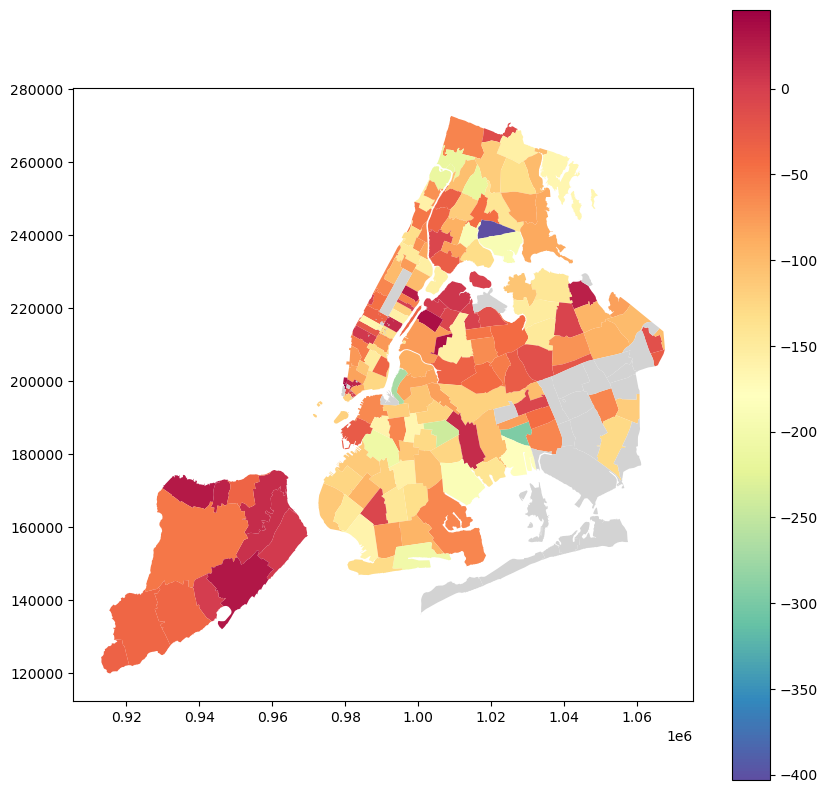

In [169]:
split.plot(column='20_21_Change',colormap='Spectral_r',legend=True,markersize=0.01,figsize=(10,10),missing_kwds={
                "color": "lightgrey",
                "hatch": "",
                "label": "Missing values",
                },)
     